In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import cv2
import tensorflow as tf
import os
import pandas as pd

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [38]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
	"../leaves/images/", 
	shuffle = True, 
	image_size = (IMAGE_SIZE, IMAGE_SIZE), 
	batch_size = BATCH_SIZE
)
class_names = dataset.class_names

Found 12154 files belonging to 8 classes.


In [39]:
def load_image():
	for image_batch, label_batch in dataset.take(1):
		img = image_batch[0].numpy().astype("uint8")
		type_leave = class_names[label_batch[0]]
	return img, type_leave

In [5]:
def remove_back(img, size_fill, enhance_val, buffer_size):
	img_img = Image.fromarray(img, mode="RGB")
	contr_img = ImageEnhance.Contrast(img_img).enhance(enhance_val)
	gray_img = pcv.rgb2gray_lab(rgb_img=np.array(contr_img), channel='a')
	thresh = pcv.threshold.triangle(gray_img=gray_img, object_type="dark", xstep= 100)
	edge_ok = pcv.fill(bin_img=thresh, size=5000)
	mask = pcv.fill(bin_img=pcv.invert(gray_img=edge_ok), size=size_fill)
	contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	mask_with_buffer = mask.copy()
	if (len(contours)):
		cv2.drawContours(mask_with_buffer, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), buffer_size)
	if (mask_with_buffer[0,0] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[-1,0] == 0):
		mask_with_buffer[0:11,0:11] = 255
		mask_with_buffer[-11:,-11:] = 255
		mask_with_buffer[0:11,-11:] = 255
		mask_with_buffer[-11:,0:11] = 255
	mask_with_buffer[0:1,:] = 255
	mask_with_buffer[-1:,:] = 255
	mask_with_buffer[:,0:1] = 255
	mask_with_buffer[:,-1:] = 255
	mask_with_buffer = pcv.fill(bin_img=mask_with_buffer, size=size_fill)
	result = np.ones_like(img) * 255
	result[mask_with_buffer == 0] = img[mask_with_buffer == 0]
	return result

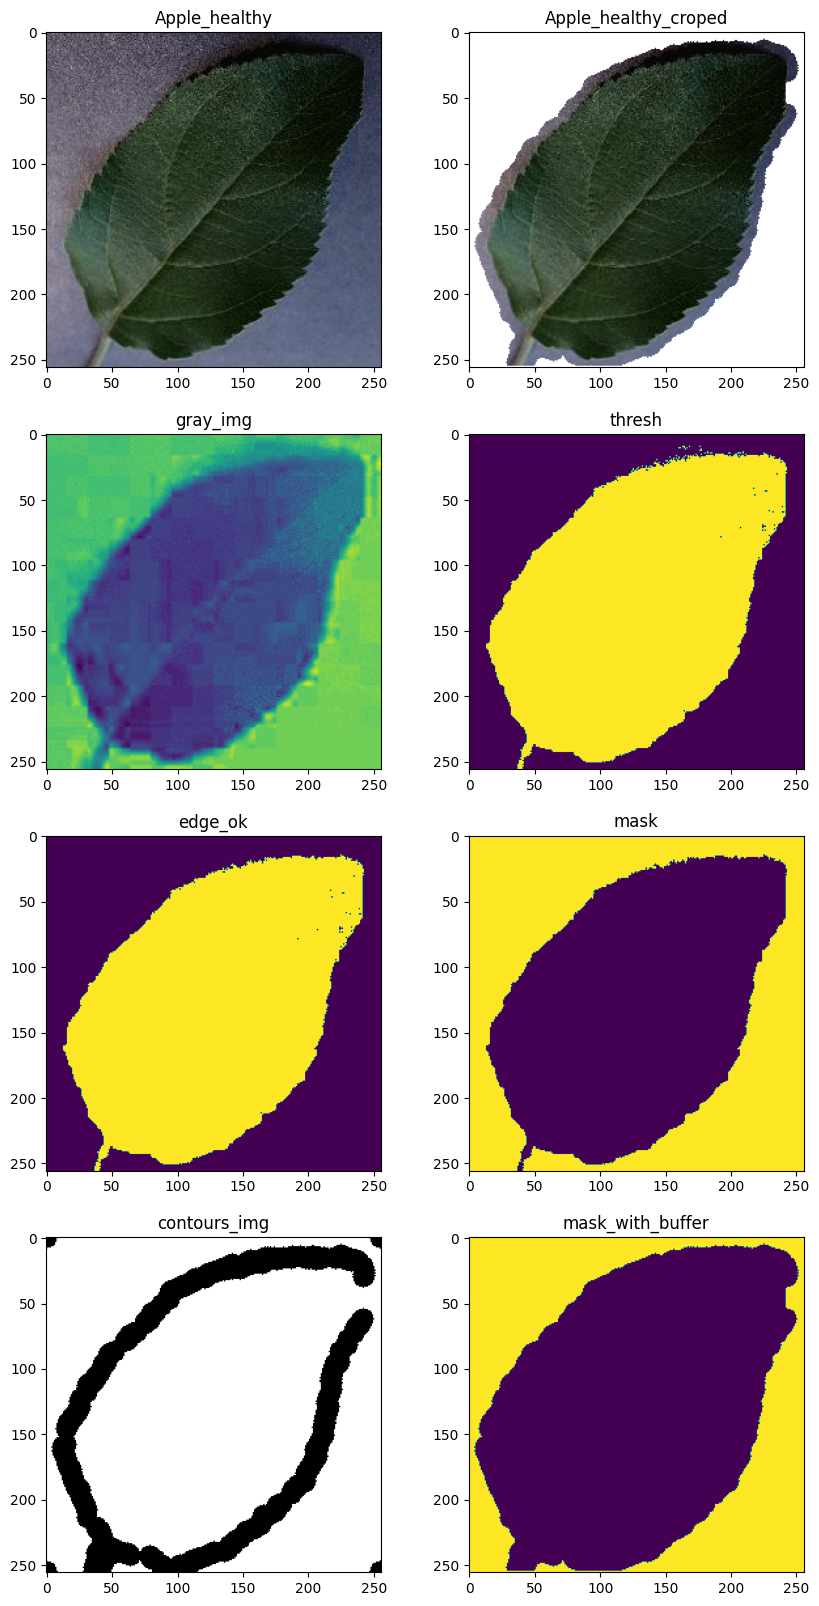

In [67]:
img, type_leave = load_image()
gray_img = pcv.rgb2gray_lab(rgb_img=img, channel='a')
thresh = pcv.threshold.triangle(gray_img=gray_img, object_type="dark", xstep= 100)
edge_ok = pcv.fill(bin_img=thresh, size=5000)
mask = pcv.fill(bin_img=pcv.invert(gray_img=edge_ok), size=1000)
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_img = np.ones_like(img) * 255
mask_with_buffer = mask.copy()
if (len(contours)):
	cv2.drawContours(mask_with_buffer, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), 15)
	cv2.drawContours(contours_img, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), 15)
if (mask_with_buffer[0,0] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[0,-1] == 0 and mask_with_buffer[-1,0] == 0):
	mask_with_buffer[0:11,0:11] = 255
	mask_with_buffer[-11:,-11:] = 255
	mask_with_buffer[0:11,-11:] = 255
	mask_with_buffer[-11:,0:11] = 255
mask_with_buffer[0:1,:] = 255
mask_with_buffer[-1:,:] = 255
mask_with_buffer[:,0:1] = 255
mask_with_buffer[:,-1:] = 255
mask_with_buffer = pcv.fill(bin_img=mask_with_buffer, size=1000)
result = np.ones_like(img) * 255
result[mask_with_buffer == 0] = img[mask_with_buffer == 0]

plt.figure(figsize=(2 * 5, 4 * 5))
plt.subplot(4, 2, 1)
plt.title(type_leave)
plt.imshow(img)
plt.subplot(4, 2, 2)
plt.title(type_leave + "_croped")
plt.imshow(result)
plt.subplot(4, 2, 3)
plt.title("gray_img")
plt.imshow(gray_img)
plt.subplot(4, 2, 4)
plt.title("thresh")
plt.imshow(thresh)
plt.subplot(4, 2, 5)
plt.title("edge_ok")
plt.imshow(edge_ok)
plt.subplot(4, 2, 6)
plt.title("mask")
plt.imshow(mask)
plt.subplot(4, 2, 7)
plt.title("contours_img")
plt.imshow(contours_img)
plt.subplot(4, 2, 8)
plt.title("mask_with_buffer")
plt.imshow(mask_with_buffer)
plt.show()

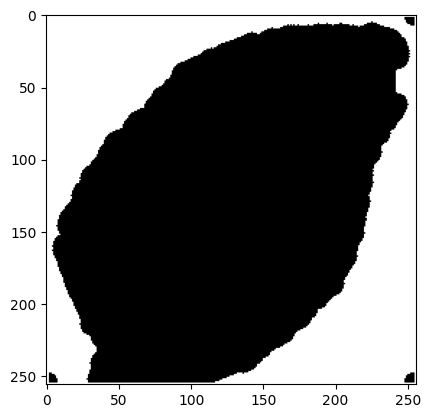

In [54]:
mask_with_buffer[0:2,:] = 255
mask_with_buffer[-1:,:] = 255
mask_with_buffer[:,0:2] = 255
mask_with_buffer[:,-1:] = 255

pcv.plot_image(mask_with_buffer)

In [ ]:
img, type_leave, file_path, file  = load_image()
colorspace = pcv.visualize.colorspaces(rgb_img=img)
gray_img = pcv.rgb2gray_cmyk(rgb_img=img, channel='y')
image_blurred = cv2.GaussianBlur(gray_img, (9, 9), 3)
# bin_mask = pcv.threshold.binary(gray_img=gray_img, threshold=35, object_type="dark")
roi = pcv.roi.rectangle(img=img, x=0, y=0, h=IMAGE_SIZE, w=IMAGE_SIZE)
# mask = pcv.roi.filter(mask=bin_mask, roi=roi, roi_type="partial")
mask = pcv.threshold.triangle(gray_img=image_blurred, object_type="dark", xstep= 100)
shape_img = pcv.analyze.size(img=img,labeled_mask=mask, n_labels=1)
gray_img2 = pcv.rgb2gray_lab(rgb_img=img, channel='a')
mask2 = pcv.threshold.triangle(gray_img=gray_img2, object_type="light", xstep= 100)

edge_ok = pcv.fill(bin_img=mask, size=1000)
mask2 = pcv.fill(bin_img=pcv.invert(gray_img=edge_ok), size=1000)
contours, _ = cv2.findContours(mask2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
mask_with_buffer = mask2.copy()
if (len(contours)):
	cv2.drawContours(mask_with_buffer, contours[np.argmax([len(c) for c in contours])], -1, (0, 0, 0), 5)
result = np.ones_like(img) * 255
result[mask_with_buffer == 0] = img[mask_with_buffer == 0]

plt.title("img")
plt.imshow(img)
plt.show()
plt.title("gray_img")
plt.imshow(gray_img)
plt.show()
plt.title("gray_img2")
plt.imshow(gray_img2)
plt.show()
plt.title("mask")
plt.imshow(mask)
plt.show()
plt.title("mask2")
plt.imshow(mask2)
plt.show()
plt.title("shape_img")
plt.imshow(shape_img)
plt.show()
pcv.visualize.histogram(img = gray_img)

In [40]:
def print_test(nb, size_fill, enhance_val, buffer_size):
	nb_col_graph = 2
	nb_lignes_graph = 32
	for image_batch, label_batch in dataset.take(1):
		plt.figure(figsize=(nb_col_graph * 4, nb_lignes_graph * 4))
		i = 0
		for j in range(min(nb, len(image_batch))):
			img = image_batch[j].numpy().astype("uint8")
			type_leave = class_names[label_batch[j]]
			plt.subplot(nb_lignes_graph, nb_col_graph, i + 1)
			plt.title(type_leave)
			plt.imshow(img)
			plt.subplot(nb_lignes_graph, nb_col_graph, i + 2)
			plt.title(type_leave + "_croped")
			plt.imshow(remove_back(img, size_fill, enhance_val, buffer_size))
			i = i + 2
		plt.show()

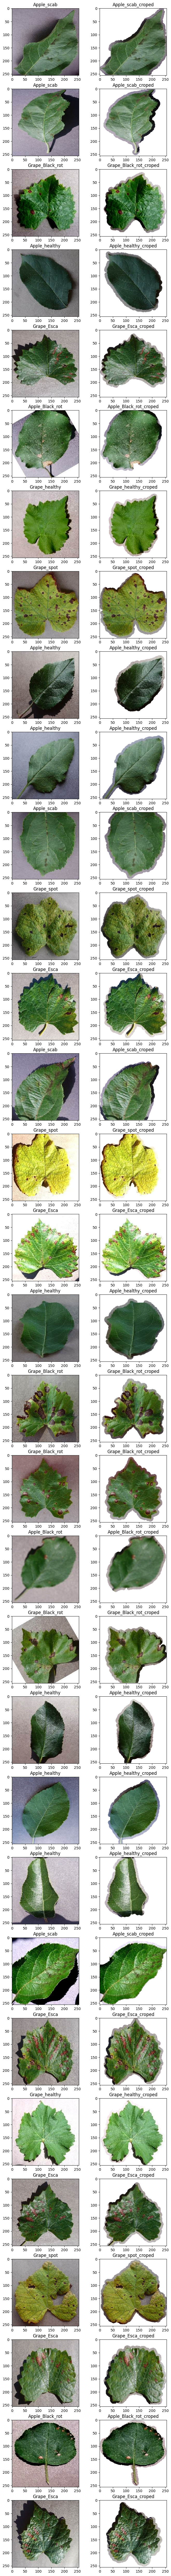

In [41]:
print_test(32,5000, 1, 15)

In [4]:
def retrieve_file_subdir(dir):
    data = {}
    for foldername, subdirectory, filenames in os.walk(dir):
        base_foldername = os.path.basename(foldername)
        file_names = []
        for filename in filenames:
            file_names.append(filename)
        data[base_foldername] = pd.Series(file_names)
    df = pd.concat(data, axis=1)  # To deal with dict
    df.dropna(axis=1, how="all", inplace=True)
    return df

In [7]:
df = retrieve_file_subdir("../leaves/images")

In [8]:
df

Grape_Esca                   Apple_rust   Grape_Black_rot  \
0      image (285).JPG      image (183)_rotated.JPG   image (285).JPG   
1      image (875).JPG              image (177).JPG   image (875).JPG   
2     image (1381).JPG              image (109).JPG  image (1148).JPG   
3     image (1148).JPG              image (189).JPG   image (177).JPG   
4      image (177).JPG  image (269)_illuminated.JPG   image (109).JPG   
...                ...                          ...               ...   
1635               NaN                          NaN               NaN   
1636               NaN                          NaN               NaN   
1637               NaN                          NaN               NaN   
1638               NaN                          NaN               NaN   
1639               NaN                          NaN               NaN   

                    Grape_healthy     Apple_healthy  \
0     image (374)_illuminated.JPG   image (285).JPG   
1                 image (285).JPG   image (875).JPG   
2          image (412)_scaled.JPG  image (1381).JPG   
3                 image (177).JPG  image (1148).JPG   
4                 image (109).JPG   image (177).JPG   
...                           ...               ...   
1635                          NaN   image (721).JPG   
1636                          NaN   image (939).JPG   
1637                          NaN  image (1181).JPG   
1638                          NaN   image (879).JPG   
1639                          NaN   image (786).JPG   

                       Grape_spot                  Apple_scab  \
0     image (374)_illuminated.JPG             image (285).JPG   
1                 image (285).JPG  image (431)_contrasted.JPG   
2                 image (875).JPG             image (177).JPG   
3      image (436)_contrasted.JPG      image (329)_scaled.JPG   
4          image (563)_scaled.JPG             image (109).JPG   
...                           ...                         ...   
1635                          NaN                         NaN   
1636                          NaN                         NaN   
1637                          NaN                         NaN   
1638                          NaN                         NaN   
1639                          NaN                         NaN   

                 Apple_Black_rot  
0                image (285).JPG  
1     image (431)_contrasted.JPG  
2         image (563)_scaled.JPG  
3         image (121)_fliped.JPG  
4                image (177).JPG  
...                          ...  
1635                         NaN  
1636                         NaN  
1637                         NaN  
1638                         NaN  
1639                         NaN  

[1640 rows x 8 columns]

In [14]:
i = 0
data = []
path = ""
for foldername, subdirectory, filenames in os.walk("../leaves/images"):
    base_foldername = os.path.basename(foldername)
    print(subdirectory)
    print(base_foldername)
    print(type(filenames))
    print(i)
    i += 1
    # file_names = []
    # for filename in filenames:
    #     file_names.append(filename)
    # data[base_foldername] = pd.Series(file_names)

['Grape_Esca', 'Apple_rust', 'Grape_Black_rot', 'Grape_healthy', 'Apple_healthy', 'Grape_spot', 'Apple_scab', 'Apple_Black_rot']
images
<class 'list'>
0
[]
Grape_Esca
<class 'list'>
1
[]
Apple_rust
<class 'list'>
2
[]
Grape_Black_rot
<class 'list'>
3
[]
Grape_healthy
<class 'list'>
4
[]
Apple_healthy
<class 'list'>
5
[]
Grape_spot
<class 'list'>
6
[]
Apple_scab
<class 'list'>
7
[]
Apple_Black_rot
<class 'list'>
8
